In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")  
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Dataset Shape & Info
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Identify Missing Values
missing_values = df.isnull().sum()
missing_values


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# Missing Percentage Calculation
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_percentage.sort_values(ascending=False)


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

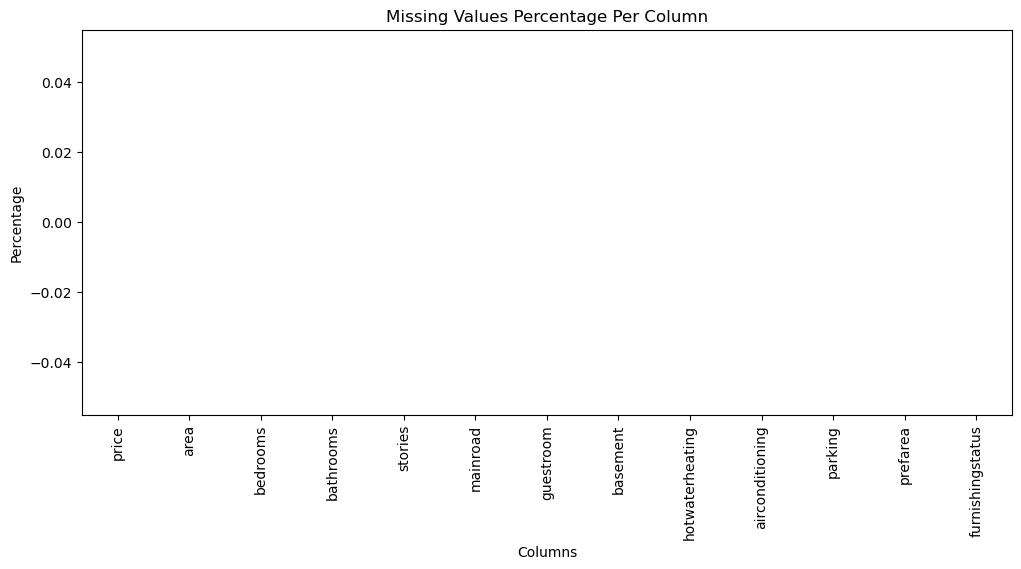

In [7]:
# Visualization of Missing Data
plt.figure(figsize=(12,5))
missing_percentage.plot(kind='bar')
plt.title("Missing Values Percentage Per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


In [8]:
# Backup Original Dataset (For Comparison)
original_df = df.copy()


In [13]:
# Handle Numerical Columns (Median Imputation)
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mode())

print("Numerical columns missing values handled.")


Numerical columns missing values handled.


In [12]:
# Handle Categorical Columns (Mode Imputation)
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Categorical columns missing values handled.")


Categorical columns missing values handled.


In [11]:
# Remove Columns With High Missing Values
#Threshold = 40%
threshold = 40

cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped Columns:", list(cols_to_drop))


Dropped Columns: []


In [14]:
# Validate Cleaned Dataset
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
# Compare Before vs After
print("Before Cleaning Shape:", original_df.shape)
print("After Cleaning Shape:", df.shape)


Before Cleaning Shape: (545, 13)
After Cleaning Shape: (545, 13)


In [16]:
# Save Cleaned Dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [17]:
# Final Preview
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
